In [1]:
def GetResultFeature(ResultFeature):
        print("\tTag:'{}', Name:'{}'".format(ResultFeature.tag(), ResultFeature.name()) )
        for ri in range(ResultFeature.getRenderGroups()) :
            dataTypes = ResultFeature.getDataTypes(ri)
            for gi in range(ResultFeature.getGroups(ri)) :
                p = np.array( ResultFeature.getVertices(ri,gi) )
                t = np.array( ResultFeature.getElements(ri,gi) )
                for dataType in dataTypes :
                    d = np.array( ResultFeature.getData(ri,gi,dataType) )
                    print("\t'%s'" % dataType, 
                          "vertices:{} elements:{}".format(p.shape, t.shape))
            print()
            
            
def GetResultsClient(model_java):
        ResultsClient = model_java.result()
        print("[ResultsClient]\nTag:'{}', Name:'{}' -> Tags:{}\n".format(ResultsClient.name(),
                                                                      ResultsClient.tag(),ResultsClient.tags()) )

        for ResultFeatures in ResultsClient :
            ResultFeatureListClient = ResultFeatures.feature()
            print("  Tag:'{}', Name:'{}' -> Tags:{}".format(ResultFeatures.tag(), ResultFeatures.name(), 
                                        ResultFeatureListClient.tags()) )
            
            for ResultFeature in ResultFeatureListClient :
                GetResultFeature(ResultFeature)



In [2]:
def PlotPlotGroup2D(ResultFeature) :
        c2vtk = vtk_tools.Comsol2Vtk()

        Indices = []
        for ri in range(ResultFeature.getRenderGroups()) :
            for gi in range( ResultFeature.getGroups(ri) ) :
                for di in ResultFeature.getDataTypes(ri) : 
                    Indices.append([ri,gi,di])

        Curves = []
        for (ri,gi,di) in Indices :
            print("\tRenderGroup:{}, Group:{}, DataTypes:'{}'".format(ri,gi,di), end=" -> ")
            Vertices = np.array( ResultFeature.getVertices(ri,gi) ).T
            Elements = np.array( ResultFeature.getElements(ri,gi) ).T
            Data     = np.array( ResultFeature.getData(ri,gi,di) ).flatten()
            print("vertices:{}, elements:{}".format(Vertices.shape, Elements.shape))

            Vertices[Elements,:]
            Data[Elements]
            assert len(Vertices) == len(Data)
            assert Elements.shape[1] == 2     ## == set of lines  

            Ys = Data[Elements].flatten()             
            Xs = Vertices[Elements,:].flatten() 
            Order = np.argsort(Xs)
            Curves.append( [Xs[Order],Ys[Order]] ) 
        return Curves


def PlotPlotGroup3D(ResultFeature) :
        c2vtk = vtk_tools.Comsol2Vtk()

        Indices = []
        for ri in range(ResultFeature.getRenderGroups()) :
            for gi in range( ResultFeature.getGroups(ri) ) :
                for di in ResultFeature.getDataTypes(ri) : 
                    Indices.append([ri,gi,di])

        Vtus = []
        for (ri,gi,di) in Indices :
            print("\tRenderGroup:{}, Group:{}, DataTypes:'{}'".format(ri,gi,di), end=" -> ")
            Vertices = np.array( ResultFeature.getVertices(ri,gi) ).T
            Elements = np.array( ResultFeature.getElements(ri,gi) ).T
            Data     = np.array( ResultFeature.getData(ri,gi,di) ).flatten()
            print("vertices:{}, elements:{}".format(Vertices.shape, Elements.shape))

            Vertices[Elements,:]
            assert len(Vertices) == len(Data)
            assert Elements.shape[1] == 3     ## == 'tri' 

            Vtu = vtk_tools.GetSimpleUnstructuredGrid()
            Vtu.SetVertices(Vertices[:,0], Vertices[:,1], Vertices[:,2])
            Vtu.AddPointArray(Data,'prop')
            Vtu.SetAnyCells(Elements, c2vtk.VtkCell.get('tri'))
            Vtus.append( Vtu.Mesh )

        vtm = vtk_tools.GetMultiBlockDataSetFromList( Vtus )
        return vtm
    

In [3]:
COMSOL="$OUTPUT_PATH/COMSOL56/Python/MPh"
VTK_TOOLS="$OUTPUT_PATH/COMSOL56/Python/"

import sys;

sys.path.append(COMSOL)
import mph;

sys.path.append(VTK_TOOLS)
import vtk_tools

import vtk
import numpy as np 
import pandas as pd

import os
print("PWD:", os.getcwd())  


DEBUG:mph:Using default configuration.


-----------------------
+Running 'ipykernel_launcher'... 
PWD: $OUTPUT_PATH/COMSOL/TESTS


In [4]:
CASE ="$OUTPUT_PATH/COMSOL56/CASES/"
mph_name = "%s/power_transistor_Model.mph" % CASE

client   = mph.start(cores=1)
model    = client.load(mph_name)
mph_name = mph_name.replace(".mph","")

mph.tree(model)


INFO:mph:Starting local Comsol session.
DEBUG:mph:Checking installation folder "/Applications/COMSOL56/Multiphysics".
DEBUG:mph:Reported version info is "[comsol] CONFIG_FILE /Applications/COMSOL56/Multiphysics/bin/maci64/comsolcompile.ini
COMSOL Multiphysics 5.6.0.401".
DEBUG:mph:Assigned name "5.6" to this installation.
DEBUG:mph:No folder "Multiphysics" in "COMSOL56.app".
INFO:mph:Starting external server process.
INFO:mph:Server restricted to 1 processor core.


Version: '[comsol] CONFIG_FILE /Applications/COMSOL56/Multiphysics/bin/maci64/comsolcompile.ini
COMSOL Multiphysics 5.6.0.401' 


INFO:mph:Server listening on port 58854.
DEBUG:mph:JPype version is 1.3.0.
INFO:mph:Starting Java virtual machine.
DEBUG:mph:JVM arguments: ['/Applications/COMSOL56/Multiphysics/java/maci64/jre/Contents/Home/lib/server/libjvm.dylib']
INFO:mph:Java virtual machine has started.
INFO:mph:Connecting to server "localhost" at port 58854.
INFO:mph:Running on 1 processor core.
INFO:mph:Loading model "power_transistor_Model.mph".
INFO:mph:Finished loading model.


power_transistor_Model
├─ parameters
│  └─ Parameters 1
├─ functions
│  ├─ Blackbody Radiation Intensity
│  └─ Smoothed Heaviside Function
├─ components
│  └─ Component 1
├─ geometries
│  └─ Geometry 1
│     ├─ Block 1
│     ├─ Work Plane 1
│     ├─ Extrude 1
│     ├─ Block 2
│     ├─ Block 3
│     ├─ Hexahedron 1
│     ├─ Union 1
│     ├─ Block 4
│     ├─ Block 5
│     ├─ Block 6
│     ├─ Block 7
│     ├─ Hexahedron 2
│     ├─ Mirror 1
│     ├─ Union 2
│     ├─ Cylinder 1
│     ├─ Difference 1
│     ├─ Transistor Chip
│     ├─ Work Plane 3
│     ├─ Revolve 1
│     ├─ Union 3
│     ├─ Array 1
│     ├─ Form Union
│     ├─ Form Composite Domains 1
│     └─ Form Composite Domains 2
├─ views
│  ├─ View 1
│  ├─ View 2
│  ├─ View 3
│  └─ View 4
├─ selections
│  └─ Transistor Chip
├─ coordinates
│  └─ Boundary System 1
├─ variables
├─ couplings
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ Integration
│  ├─ 

In [5]:
GetResultsClient(model.java)

[ResultsClient]
Tag:'Results', Name:'result' -> Tags:['pg1', 'pg2', 'pg3', 'pg4']

  Tag:'pg1', Name:'Electric Potential (ec)' -> Tags:['surf1']
	Tag:'surf1', Name:'Surface 1'
	'Color' vertices:(3, 94715) elements:(3, 18952)

  Tag:'pg2', Name:'Temperature (ht)' -> Tags:['surf1', 'arws1']
	Tag:'surf1', Name:'Surface'
	'Color' vertices:(3, 26490) elements:(3, 46488)

	Tag:'arws1', Name:'Arrow Surface 1'
	'VectorX' vertices:(3, 5061) elements:(0,)
	'VectorY' vertices:(3, 5061) elements:(0,)
	'VectorZ' vertices:(3, 5061) elements:(0,)

  Tag:'pg3', Name:'Isothermal Contours (ht)' -> Tags:['iso1']
	Tag:'iso1', Name:'Isosurface'
	'IsoLevel' vertices:(3, 604) elements:(3, 1024)
	'IsoLevel' vertices:(3, 1961) elements:(3, 3332)
	'IsoLevel' vertices:(3, 2347) elements:(3, 3994)
	'IsoLevel' vertices:(3, 3303) elements:(3, 5692)
	'IsoLevel' vertices:(3, 5321) elements:(3, 9373)
	'IsoLevel' vertices:(3, 16752) elements:(3, 30537)
	'IsoLevel' vertices:(3, 13683) elements:(3, 25935)
	'IsoLevel' ver

In [6]:
ResultsClient = model.java.result()

ResultFeatureClient = ResultsClient.get('pg3').feature('iso1')
GetResultFeature(ResultFeatureClient)
vtm = PlotPlotGroup3D(ResultFeatureClient)

vtk_tools.Writer(vtm,'plotGroup3D') 


	Tag:'iso1', Name:'Isosurface'
	'IsoLevel' vertices:(3, 604) elements:(3, 1024)
	'IsoLevel' vertices:(3, 1961) elements:(3, 3332)
	'IsoLevel' vertices:(3, 2347) elements:(3, 3994)
	'IsoLevel' vertices:(3, 3303) elements:(3, 5692)
	'IsoLevel' vertices:(3, 5321) elements:(3, 9373)
	'IsoLevel' vertices:(3, 16752) elements:(3, 30537)
	'IsoLevel' vertices:(3, 13683) elements:(3, 25935)
	'IsoLevel' vertices:(3, 182) elements:(3, 286)
	'IsoLevel' vertices:(3, 3053) elements:(3, 5878)
	'IsoLevel' vertices:(3, 3689) elements:(3, 7156)

	RenderGroup:0, Group:0, DataTypes:'IsoLevel' -> vertices:(604, 3), elements:(1024, 3)
	RenderGroup:0, Group:1, DataTypes:'IsoLevel' -> vertices:(1961, 3), elements:(3332, 3)
	RenderGroup:0, Group:2, DataTypes:'IsoLevel' -> vertices:(2347, 3), elements:(3994, 3)
	RenderGroup:0, Group:3, DataTypes:'IsoLevel' -> vertices:(3303, 3), elements:(5692, 3)
	RenderGroup:0, Group:4, DataTypes:'IsoLevel' -> vertices:(5321, 3), elements:(9373, 3)
	RenderGroup:0, Group:5, Dat

'plotGroup3D.vtm'

In [7]:
ResultsClient = model.java.result()

ResultFeatureClient = ResultsClient.get('pg4').feature('lngr1')
GetResultFeature(ResultFeatureClient)
Curves = PlotPlotGroup2D(ResultFeatureClient) 


	Tag:'lngr1', Name:'Line Graph 1'
	'Height' vertices:(1, 246) elements:(2, 245)

	RenderGroup:0, Group:0, DataTypes:'Height' -> vertices:(246, 1), elements:(245, 2)


DEBUG:matplotlib:(private) matplotlib data path: /Users/poderozita/anaconda3/envs/jmake2021/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /Users/poderozita/anaconda3/envs/jmake2021/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/poderozita/.matplotlib
DEBUG:matplotlib:matplotlib version 3.3.4
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', '_collections_abc', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'impor

DEBUG:matplotlib:CACHEDIR=/Users/poderozita/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/poderozita/.matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Manichaean' (NotoSansManichaean-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hanifi Rohingya' (NotoSansHanifiRohingya-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.3

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans NKo' (NotoSansNKo-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Chakma' (NotoSansChakma-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Osage' (NotoSansOsage-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tamil Sangam MN' (Tamil Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Takri' (NotoSansTakri-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Saurashtra' (NotoSansSaurashtra-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Meetei Mayek' (NotoSansMeeteiMayek-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier Ne

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hatran' (NotoSansHatran-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Shree Devanagari 714' (Shree714.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/poderozita/anaconda3/envs/jmake2021/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


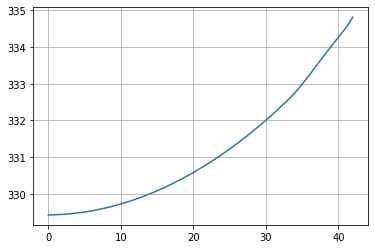

In [8]:
import matplotlib.pyplot as plt

for (x,y) in Curves : 
    plt.plot(x,y)
    
plt.grid()
plt.show()